In [1]:
import pandas as pd
import numpy as np
import sys
import pickle
import warnings
warnings.filterwarnings("ignore")

sys.path.insert(0, '..')
from DataModule.Data_Preparation import CoronnaCERTAINDataset
import FineTuneModule
import EvaluationModule

import xgboost as xgb
import sklearn
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.pipeline import Pipeline

(CVXPY) Jul 20 06:39:24 PM: Encountered unexpected exception importing solver CVXOPT:
ImportError("dlopen(/Users/gaskell/miniforge_x86_64/envs/ADPred_new/lib/python3.10/site-packages/cvxopt/base.cpython-310-darwin.so, 0x0002): tried: '/Users/gaskell/miniforge_x86_64/envs/ADPred_new/lib/python3.10/site-packages/cvxopt/base.cpython-310-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64e'))")
(CVXPY) Jul 20 06:39:24 PM: Encountered unexpected exception importing solver GLPK:
ImportError("dlopen(/Users/gaskell/miniforge_x86_64/envs/ADPred_new/lib/python3.10/site-packages/cvxopt/base.cpython-310-darwin.so, 0x0002): tried: '/Users/gaskell/miniforge_x86_64/envs/ADPred_new/lib/python3.10/site-packages/cvxopt/base.cpython-310-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64e'))")
(CVXPY) Jul 20 06:39:24 PM: Encountered unexpected exception importing solver GLPK_MI:
ImportError("dlopen(/Users/gaskell/miniforge_x86_64/e

In [2]:
dataset = CoronnaCERTAINDataset(
    library_root = '/Users/gaskell/Dropbox/Mac/Desktop/Autoimmune_Disease/Code/ML_RA_EHR/Dataset/',
    challenge = 'binary_classification', #option: regression, regression_delta, regression_delta_binary, classification, binary_classification
    dataset = 'CORRONA CERTAIN', 
    process_approach = 'SC', #option: KVB, SC
    imputation = 'IterativeImputer', #option: SimpleFill, KNN, SoftImpute, BiScaler, NuclearNormMinimization, IterativeImputer, IterativeSVD, None(raw)
    patient_group = 'bionaive TNF', #option: "all", "bioexp nTNF", "bionaive TNF", "bionaive orencia", "KVB"
    drug_group = 'all', #option: "all", "actemra", "cimzia", "enbrel", "humira", "orencia", "remicade", "rituxan", "simponi"
    time_points = (0,3), 
    train_test_rate = 0.8,
    remove_low_DAS = True,
    save_csv = False, 
    random_state = 2022,
    verbose=False)
# read train, test from dataloader
train_set, train_loc = dataset.get_train()
test_set, test_loc = dataset.get_test()

aml = EvaluationModule.AutoBuild(seed=dataset.random_state, project_name="SC_Jul18_test", challenge=dataset.challenge, balance_class=0)
# define models
if "regression" in dataset.challenge:
    model = FineTuneModule.fine_tune(train=train_set, model="drf_regression", search_methods="RandomSearch")
#     model = RandomForestRegressor()
elif "classification" in dataset.challenge:
    model = FineTuneModule.fine_tune(train=train_set, model="drf_classification", search_methods="RandomSearch")
aml.validate("rf", model, train_set, test_set)
# aml.validation_output(dataset)
# aml.test_output(dataset)

param_search_grid: {'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, None], 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
best_params: {'n_estimators': 1400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_samples': None, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}


In [3]:
aml.train_perf

,model,MAE,MSE,RMSE,R2,Pearson_Correlation,Accuracy,F1-Score
0,rf,None,None,None,None,None,0.997549,0.997548
1,rf,None,None,None,None,None,1.000000,1.000000
2,rf,None,None,None,None,None,0.995157,0.995157
3,rf,None,None,None,None,None,0.997579,0.997579
4,rf,None,None,None,None,None,0.997567,0.997567
5,rf,None,None,None,None,None,0.997555,0.997554
6,rf,None,None,None,None,None,0.997555,0.997554
7,rf,None,None,None,None,None,1.000000,1.000000
8,rf,None,None,None,None,None,1.000000,1.000000
9,rf,None,None,None,None,None,0.997543,0.997542


In [4]:
aml.val_perf

,model,MAE,MSE,RMSE,R2,Pearson_Correlation,Accuracy,F1-Score
0,rf,None,None,None,None,None,0.709677,0.502674
1,rf,None,None,None,None,None,0.806452,0.690000
2,rf,None,None,None,None,None,0.677419,0.403846
3,rf,None,None,None,None,None,0.806452,0.569444
4,rf,None,None,None,None,None,0.766667,0.433962
5,rf,None,None,None,None,None,0.633333,0.387755
6,rf,None,None,None,None,None,0.766667,0.433962
7,rf,None,None,None,None,None,0.800000,0.567308
8,rf,None,None,None,None,None,0.733333,0.659091
9,rf,None,None,None,None,None,0.800000,0.640000


In [5]:
aml.test_perf

,model,MAE,MSE,RMSE,R2,Pearson_Correlation,Accuracy,F1-Score
0,rf,None,None,None,None,None,0.694118,0.444165


1.0    82
0.0     3
Name: pred, dtype: int64


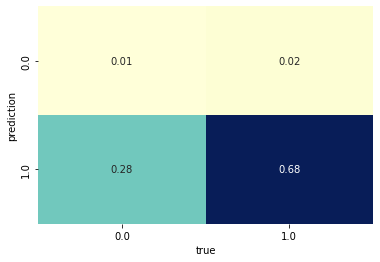

In [6]:
aml.confusion_matrix("rf")